In [17]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
pd.options.display
pd.set_option('display.max_rows',1200,'display.max_columns',100)

In [19]:
#importing train dataset
df_train=pd.read_csv('Train.csv')

In [20]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [21]:
df_train.shape

(1168, 81)

In [22]:
#checking for duplicate instances
duplicate_rows=df_train[df_train.duplicated()]
print(duplicate_rows.shape)

(0, 81)


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [24]:
df_train.isnull().values.any()

True

In [25]:
for column in df_train.columns:
    if df_train[column].dtypes==object:
        print(str(column)+':'+str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print('************************************************************************************************************')
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
************************************************************************************************************


Street:['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64
************************************************************************************************************


Alley:[nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64
************************************************************************************************************


LotShape:['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
************************************************************************************************************


LandContour:['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
***********************************

# Data Initial Preprocessing

Label mapping to feature classes

In [26]:
df_train['Alley']=df_train.Alley.map({'Grvl':0,'Pave':1})

In [27]:
df_train['LotShape']=df_train.LotShape.map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [28]:
df_train['LandContour']=df_train.LandContour.map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})

In [29]:
df_train['LotConfig']=df_train.LotConfig.map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})

In [30]:
df_train['LandSlope']=df_train.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})

In [31]:
df_train['Neighborhood']=df_train.Neighborhood.map({'NAmes':0,'CollgCr':1,'OldTown':2,'Edwards':3,'Somerst':4,'Gilbert':5,'NridgHt':6,'Sawyer':7,'NWAmes':8,'SawyerW':9,'BrkSide':10,'Crawfor':11,'NoRidge':12,'Mitchel':13,'IDOTRR':14,'Timber':15,'ClearCr':16,'SWISU':17,'StoneBr':18,'Blmngtn':19,'BrDale':20,'Veenker':21,'MeadowV':22,'NPkVill':23,'Blueste':24})

In [32]:
df_train['Condition1']=df_train.Condition1.map({'Norm':0,'Feedr':1,'Artery':2,'RRAn':3,'PosN':4,'RRAe':5,'PosA':6,'RRNn':7,'RRNe':8})

In [33]:
df_train['Condition2']=df_train.Condition2.map({'Norm':0,'Feedr':1,'Artery':2,'RRAn':3,'PosN':4,'RRAe':5,'PosA':6,'RRNn':7,'RRNe':8})

In [34]:
df_train['BldgType']=df_train.BldgType.map({'1Fam':0,'TwnhsE':1,'Duplex':2,'Twnhs':3,'2fmCon':4})

In [35]:
df_train['HouseStyle']=df_train.HouseStyle.map({'1Story':0,'2Story':1,'1.5Fin':2,'SLvl':3,'SFoyer':4,'1.5Unf':5,'2.5Unf':6,'2.5Fin':7})

In [36]:
df_train['RoofStyle']=df_train.RoofStyle.map({'Gable':0,'Hip':1,'Flat':2,'Gambrel':3,'Mansard':4,'Shed':5})

In [37]:
df_train['RoofMatl']=df_train.RoofMatl.map({'CompShg':0,'Tar&Grv':1,'WdShngl':2,'WdShake':3,'Metal':4,'Roll':5,'ClyTile':6,'Membran':7})

In [38]:
df_train['Exterior1st']=df_train.Exterior1st.map({'VinylSd':0,'HdBoard':1,'MetalSd':2,'Wd Sdng':3,'Plywood':4,'CemntBd':5,'BrkFace':6,'Stucco':7,'AsbShng':8,'AsbShng':9,'WdShing':10,'Stone':11,'ImStucc':12,'BrkComm':13,'AsphShn':14})

In [39]:
df_train['Exterior2nd']=df_train.Exterior2nd.map({'VinylSd':0,'MetalSd':1,'HdBoard':2,'Wd Sdng':3,'Plywood':4,'CmentBd':5,'Wd Shng':6,'Stucco':7,'BrkFace':8,'AsbShng':9,'ImStucc':10,'Brk Cmn':11,'Stone':12,'AsphShn':13,'Other':14})

In [40]:
df_train['MasVnrType']=df_train.MasVnrType.map({'None':0,'BrkFace':1,'Stone':2,'BrkCmn':3})

In [41]:
df_train['ExterQual']=df_train.ExterQual.map({'TA':2,'Gd':3,'Ex':4,'Fa':1})

In [42]:
df_train['ExterCond']=df_train.ExterCond.map({'TA':2,'Gd':3,'Fa':1,'Ex':4,'Po':0})

In [43]:
df_train['Foundation']=df_train.Foundation.map({'CBlock':0,'PConc':1,'BrkTil':2,'Slab':3,'Stone':4,'Wood':5})

In [44]:
df_train['BsmtQual']=df_train.BsmtQual.map({'TA':2,'Gd':3,'Ex':4,'Fa':1})

In [45]:
df_train['BsmtCond']=df_train.BsmtCond.map({'TA':2,'Gd':3,'Fa':1,'Po':0})

In [46]:
df_train['BsmtExposure']=df_train.BsmtExposure.map({'No':0,'Gd':3,'Av':2,'Mn':1})

In [47]:
df_train['BsmtFinType1']=df_train.BsmtFinType1.map({'Unf':0,'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5})

In [48]:
df_train['BsmtFinType2']=df_train.BsmtFinType2.map({'Unf':0,'Rec':1,'LwQ':2,'BLQ':3,'ALQ':4,'GLQ':5})

In [49]:
df_train['Heating']=df_train.Heating.map({'GasA':0,'GasW':1,'Grav':2,'Wall':3,'Floor':4,'OthW':5})

In [50]:
df_train['HeatingQC']=df_train.HeatingQC.map({'Ex':4,'TA':2,'Gd':3,'Fa':1,'Po':0})

In [51]:
df_train['CentralAir']=df_train.CentralAir.map({'Y':1,'N':0})

In [52]:
df_train['Electrical']=df_train.Electrical.map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})

In [53]:
df_train['Functional']=df_train.Functional.map({'Typ':0,'Min2':1,'Min1':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6})

In [54]:
df_train['KitchenQual']=df_train.KitchenQual.map({'TA':2,'Gd':3,'Ex':4,'Fa':1})

In [55]:
df_train['FireplaceQu']=df_train.FireplaceQu.map({'Gd':3,'TA':2,'Fa':1,'Ex':4,'Po':0})

In [56]:
df_train['GarageFinish']=df_train.GarageFinish.map({'Unf':0,'RFn':1,'Fin':2})

In [57]:
df_train['GarageType']=df_train.GarageType.map({'Attchd':0,'Detchd':1,'BuiltIn':2,'Basment':3,'CarPort':4,'2Types':5})

In [58]:
df_train['GarageQual']=df_train.GarageQual.map({'TA':2,'Fa':1,'Gd':3,'Ex':4,'Po':0})

In [59]:
df_train['GarageCond']=df_train.GarageCond.map({'TA':2,'Fa':1,'Gd':3,'Po':0,'Ex':4})

In [60]:
df_train['PavedDrive']=df_train.PavedDrive.map({'Y':1,'N':0,'P':2})

In [61]:
df_train['PoolQC']=df_train.PoolQC.map({'Gd':3,'Fa':1,'Ex':4})

In [62]:
df_train['Fence']=df_train.Fence.map({'MnPrv':0,'GdPrv':1,'GdWo':2,'MnWw':3})

In [63]:
df_train['MiscFeature']=df_train.MiscFeature.map({'Shed':0,'Gar2':1,'TenC':2,'Othr':3})

In [64]:
df_train['SaleType']=df_train.SaleType.map({'WD':0,'New':1,'COD':2,'ConLD':3,'ConLI':4,'ConLw':5,'CWD':6,'Oth':7,'Con':8})

In [65]:
df_train['SaleCondition']=df_train.SaleCondition.map({'Normal':0,'Partial':1,'Abnorml':2,'Family':3,'Alloca':4,'AdjLand':5})

In [66]:
df_train['MSZoning']=df_train.MSZoning.map({'RL':0,'RM':1,'FV':2,'RH':3,'C (all)':4})

In [67]:
df_train['Street']=df_train.Street.map({'Pave':0,'Grvl':1})

In [68]:
df_train.head(5)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  127         120         0          NaN     4928       0    NaN         1   
1  889          20         0         95.0    15865       0    NaN         1   
2  793          60         0         92.0     9920       0    NaN         1   
3  110          20         0        105.0    11751       0    NaN         1   
4  422          20         0          NaN    16635       0    NaN         1   

   LandContour Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0    AllPub          0          0            23           0   
1            0    AllPub          0          1             0           0   
2            0    AllPub          2          0            12           0   
3            0    AllPub          0          0             8           0   
4            0    AllPub          3          0             8           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         1           0            6            5       1976   
1           0         0           0            8            6       1970   
2           0         0           1            7            5       1996   
3           0         0           0            6            6       1977   
4           0         0           0            6            7       1977   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1976          0         0            4            4         0.0   
1          1970          2         1            3            3         0.0   
2          1997          0         0            2            1         0.0   
3          1977          1         0            4            4         1.0   
4          2000          0         0            5            5         2.0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          2          2           0       3.0       2.0   
1         0.0          3          3           1       2.0       3.0   
2         0.0          3          2           1       3.0       2.0   
3       480.0          2          2           0       3.0       2.0   
4       126.0          3          2           0       3.0       2.0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0           0.0           2.0         120           0.0           0   
1           3.0           2.0         351           1.0         823   
2           2.0           1.0         862           0.0           0   
3           0.0           3.0         705           0.0           0   
4           0.0           2.0        1246           0.0           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        0          2           1           0   
1       1043         2217        0          4           1           0   
2        255         1117        0          4           1           0   
3       1139         1844        0          4           1           0   
4        356         1602        0          3           1           0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            2             5   
1         2         0             4             1            3             8   
2         2         1             3             1            2             8   
3         2         0             3             1            2  

In [69]:
#Id column is not contributing logically and Utilities column has unique category hence droping both   
df_train.drop(columns=['Id','Utilities'],inplace=True)

In [70]:
df_train.shape

(1168, 79)

NAN value imputation

In [71]:
from sklearn.impute import KNNImputer

In [72]:
imputer=KNNImputer(missing_values=np.NAN,n_neighbors=2)
df_train_new=imputer.fit_transform(df_train.values)
df_train_new=pd.DataFrame(df_train_new,columns=df_train.columns)
df_train_new.head(5)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0       120.0       0.0         51.5   4928.0     0.0    0.5       1.0   
1        20.0       0.0         95.0  15865.0     0.0    0.5       1.0   
2        60.0       0.0         92.0   9920.0     0.0    0.5       1.0   
3        20.0       0.0        105.0  11751.0     0.0    1.0       1.0   
4        20.0       0.0         63.0  16635.0     0.0    1.0       1.0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0.0        0.0        0.0          23.0         0.0         0.0   
1          0.0        0.0        1.0           0.0         0.0         0.0   
2          0.0        2.0        0.0          12.0         0.0         0.0   
3          0.0        0.0        0.0           8.0         0.0         0.0   
4          0.0        3.0        0.0           8.0         0.0         0.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       1.0         0.0          6.0          5.0     1976.0        1976.0   
1       0.0         0.0          8.0          6.0     1970.0        1970.0   
2       0.0         1.0          7.0          5.0     1996.0        1997.0   
3       0.0         0.0          6.0          6.0     1977.0        1977.0   
4       0.0         0.0          6.0          7.0     1977.0        2000.0   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        0.0       0.0          4.0          4.0         0.0         0.0   
1        2.0       1.0          3.0          3.0         0.0         0.0   
2        0.0       0.0          2.0          1.0         0.0         0.0   
3        1.0       0.0          4.0          4.0         1.0       480.0   
4        0.0       0.0          5.0          5.0         2.0       126.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        2.0        2.0         0.0       3.0       2.0           0.0   
1        3.0        3.0         1.0       2.0       3.0           3.0   
2        3.0        2.0         1.0       3.0       2.0           2.0   
3        2.0        2.0         0.0       3.0       2.0           0.0   
4        3.0        2.0         0.0       3.0       2.0           0.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2.0       120.0           0.0         0.0      958.0       1078.0   
1           2.0       351.0           1.0       823.0     1043.0       2217.0   
2           1.0       862.0           0.0         0.0      255.0       1117.0   
3           3.0       705.0           0.0         0.0     1139.0       1844.0   
4           2.0      1246.0           0.0         0.0      356.0       1602.0   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0      0.0        2.0         1.0         0.0     958.0       0.0   
1      0.0        4.0         1.0         0.0    2217.0       0.0   
2      0.0        4.0         1.0         0.0    1127.0     886.0   
3      0.0        4.0         1.0         0.0    1844.0       0.0   
4      0.0        3.0         1.0         0.0    1602.0       0.0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0      958.0           0.0           0.0       2.0       0.0   
1           0.0     2217.0           1.0           0.0       2.0       0.0   
2           0.0     2013.0           1.0           0.0       2.0       1.0   
3           0.0     1844.0           0.0           0.0       2.0       0.0   
4           0.0     1602.0           0.0           1.0       2.0       0.0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0           2.0           1.0          2.0           5.0         0.0   
1           4.0           1.0          3.0           8.0         0.0   
2           3.0           1.0          2.0           8.0         0.0   
3           3.0           1.0          2.0           7.0         

In [73]:
df_train_new.isnull().values.any()

False

Checking variance of features

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_train_new.columns
vif_data["VIF"] = [variance_inflation_factor(df_train_new.values, i)
                          for i in range(len(df_train_new.columns))]

In [76]:
print(vif_data)

          feature           VIF
0      MSSubClass  1.610495e+01
1        MSZoning  1.762093e+00
2     LotFrontage  1.820656e+01
3         LotArea  4.407271e+00
4          Street  1.222535e+00
5           Alley  4.452073e+00
6        LotShape  2.123874e+00
7     LandContour  2.033719e+00
8       LotConfig  1.545637e+00
9       LandSlope  2.036533e+00
10   Neighborhood  3.207166e+00
11     Condition1  1.266376e+00
12     Condition2  1.218804e+00
13       BldgType  5.543940e+00
14     HouseStyle  2.902915e+00
15    OverallQual  9.515844e+01
16    OverallCond  5.592593e+01
17      YearBuilt  3.228042e+04
18   YearRemodAdd  2.832091e+04
19      RoofStyle  1.529550e+00
20       RoofMatl  1.398274e+00
21    Exterior1st  5.548453e+00
22    Exterior2nd  5.197955e+00
23     MasVnrType  2.964419e+00
24     MasVnrArea  2.667733e+00
25      ExterQual  6.122969e+01
26      ExterCond  4.699895e+01
27     Foundation  3.138193e+00
28       BsmtQual  5.213151e+01
29       BsmtCond  5.835111e+01
30   Bsm

Observation:

From above VIF we observe that OverallQual, ExterQual, TotRmsAbvGrd, PoolQC and MoSold are the potential features in terms of output relationship and ascertaining patterns in dataset.

Summary Statistics

In [77]:
df_train_new.describe()

MSSubClass     MSZoning  LotFrontage        LotArea       Street  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean     56.767979     0.300514    71.565925   10484.749144     0.003425   
std      41.940650     0.688702    24.585805    8957.442311     0.058445   
min      20.000000     0.000000    21.000000    1300.000000     0.000000   
25%      20.000000     0.000000    60.000000    7621.500000     0.000000   
50%      50.000000     0.000000    70.000000    9522.500000     0.000000   
75%      70.000000     0.000000    81.000000   11515.500000     0.000000   
max     190.000000     4.000000   313.000000  164660.000000     1.000000   

             Alley     LotShape  LandContour    LotConfig    LandSlope  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.467894     0.404110     0.191781     0.399829     0.064212   
std       0.387294     0.571578     0.617539     0.740712     0.284088   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.500000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     1.000000     0.000000   
max       1.000000     3.000000     3.000000     4.000000     2.000000   

       Neighborhood   Condition1   Condition2     BldgType   HouseStyle  \
count   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean       6.585616     0.339041     0.033390     0.314212     0.891267   
std        5.904658     1.056153     0.374529     0.844197     1.260837   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        1.000000     0.000000     0.000000     0.000000     0.000000   
50%        5.000000     0.000000     0.000000     0.000000     1.000000   
75%       10.000000     0.000000     0.000000     0.000000     1.000000   
max       24.000000     8.000000     7.000000     4.000000     7.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd    RoofStyle  \
count  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean      6.104452     5.595890  1970.930651   1984.758562     0.261986   
std       1.390153     1.124343    30.145255     20.785185     0.588254   
min       1.000000     1.000000  1875.000000   1950.000000     0.000000   
25%       5.000000     5.000000  1954.000000   1966.000000     0.000000   
50%       6.000000     5.000000  1972.000000   1993.000000     0.000000   
75%       7.000000     6.000000  2000.000000   2004.000000     0.000000   
max      10.000000     9.000000  2010.000000   2010.000000     5.000000   

          RoofMatl  Exterior1st  Exterior2nd   MasVnrType   MasVnrArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.047945     2.107021     2.221747     0.507705   102.559932   
std       0.407003     2.369765     2.479663     0.696687   182.670937   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     2.000000     2.000000     0.000000     0.000000   
75%       0.000000     3.000000     3.000000     1.000000   160.000000   
max       7.000000    14.000000    14.000000     3.000000  1600.000000   

         ExterQual    ExterCond   Foundation     BsmtQual     BsmtCond  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      2.404110     2.079623     0.706336     2.560788     2.007705   
std       0.577543     0.355632     0.758992     0.679094     0.301994   
min       1.000000     0.000000     0.000000     1.000000     0.000000   
25%       2.000000     2.000000     0.000000     2.000000     2.000000   
50%       2.000000     2.000000     1.000000     3.000000     2.000000   
75%       3.000000     2.000000     1.000000     3.000000     2.000000   
max       4.000000     4.000000     5.000000 

# Exploratoary Data Analysis

Features relationship with output variable

Text(0.5, 1.0, 'correlation with target variable')

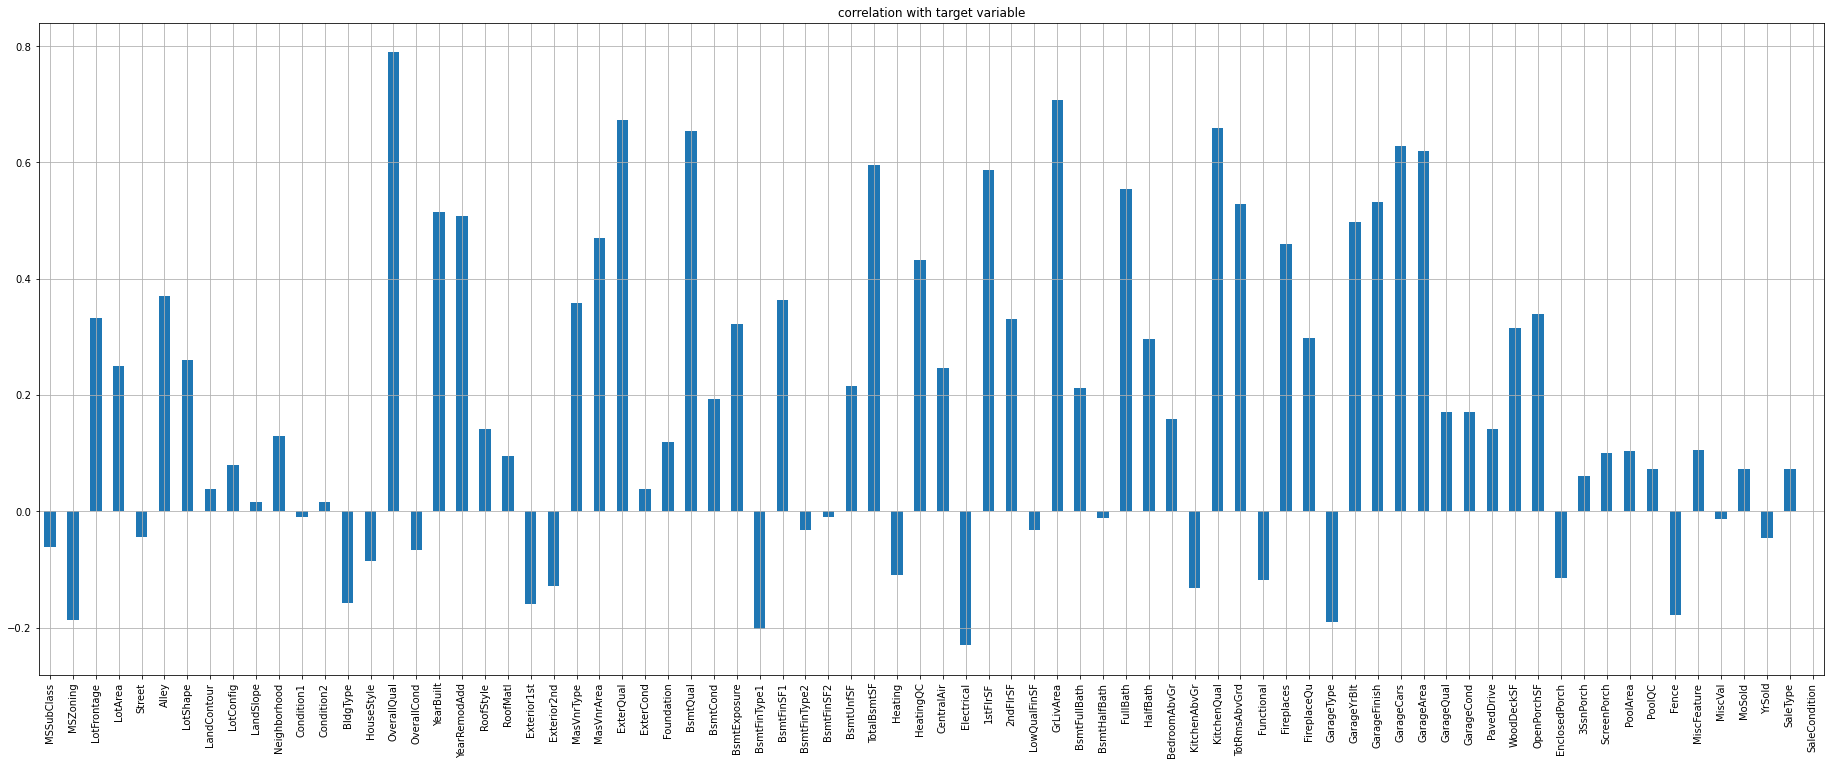

In [78]:
plt.figure(figsize=(32,12))
df_train_new.drop('SalePrice',axis=1).corrwith(df_train_new['SalePrice']).plot(kind='bar',grid=True)
plt.title("correlation with target variable")

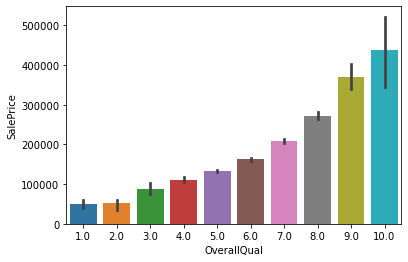

In [79]:
sns.barplot(x='OverallQual',y='SalePrice',data=df_train_new)
plt.show()

With increase in quality score of house its price also increases

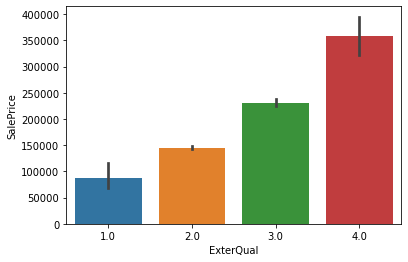

In [80]:
sns.barplot(x='ExterQual',y='SalePrice',data=df_train_new)
plt.show()

With increase in quality of the material on the exterior of house its price also increases

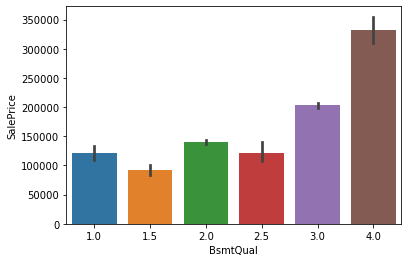

In [81]:
sns.barplot(x='BsmtQual',y='SalePrice',data=df_train_new)
plt.show()

In [96]:
df_train_new['BsmtQual'].value_counts()

2.0    537
3.0    498
4.0     94
1.0     29
1.5      7
2.5      3
Name: BsmtQual, dtype: int64

Basement height does not impact sales price significantly unless it is more than 90-99 inches

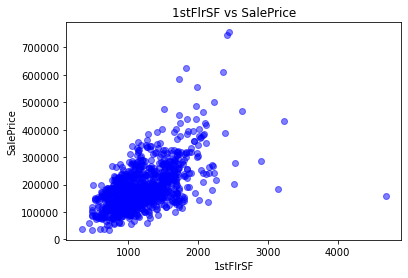

In [82]:
plt.scatter(df_train_new['1stFlrSF'],df_train_new['SalePrice'], color='blue', alpha=0.5)
plt.title("1stFlrSF vs SalePrice")
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show()

with increase in First Floor square feet area upto 2000 square feet in most of the cases sales price increases unformly except in few cases where it increases hapazardly indicates outliers. 

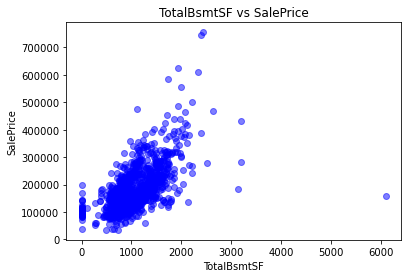

In [83]:
plt.scatter(df_train_new['TotalBsmtSF'],df_train_new['SalePrice'], color='blue', alpha=0.5)
plt.title("TotalBsmtSF vs SalePrice")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

with increase in Total square feet of basement area upto 2000 square feet in most of the cases sales price increases unformly except in few cases where it increases hapazardly indicates outliers.

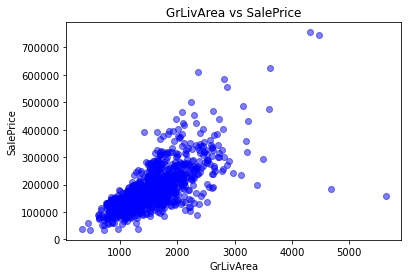

In [84]:
plt.scatter(df_train_new['GrLivArea'],df_train_new['SalePrice'], color='blue', alpha=0.5)
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

with increase in Above grade (ground) living area square feet upto 3000 square feet in most of the cases sales price increases unformly except in few cases where there are outliers or some exceptional cases.

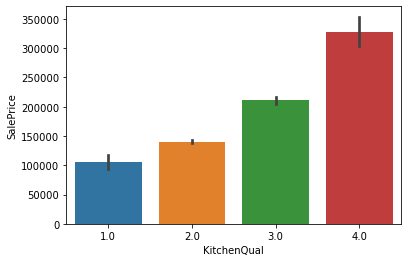

In [85]:
sns.barplot(x='KitchenQual',y='SalePrice',data=df_train_new)
plt.show()

With increase in kitchen quality of the house its price also increases

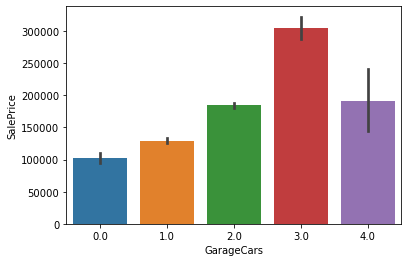

In [86]:
sns.barplot(x='GarageCars',y='SalePrice',data=df_train_new)
plt.show()

In [94]:
df_train_new['GarageCars'].value_counts()

2.0    665
1.0    288
3.0    147
0.0     64
4.0      4
Name: GarageCars, dtype: int64

With increase in Garage capacity in no of cars of the house its price also increases upto 3(Good capacity) then it decreases with garage capacity

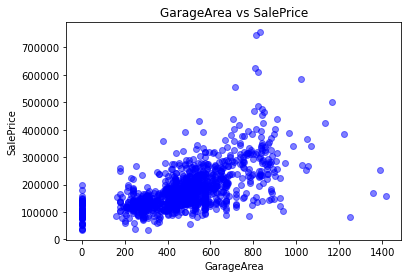

In [87]:
plt.scatter(df_train_new['GarageArea'],df_train_new['SalePrice'], color='blue', alpha=0.5)
plt.title("GarageArea vs SalePrice")
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

Garage area and sale price have quite of linear positive corelationship

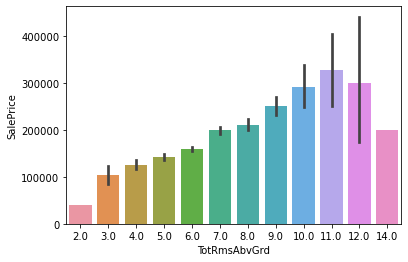

In [88]:
sns.barplot(x='TotRmsAbvGrd',y='SalePrice',data=df_train_new)
plt.show()

In [93]:
df_train_new['TotRmsAbvGrd'].value_counts()

6.0     325
7.0     268
5.0     217
8.0     148
4.0      72
9.0      65
10.0     41
11.0     13
3.0      11
12.0      6
14.0      1
2.0       1
Name: TotRmsAbvGrd, dtype: int64

with increase in no of Total rooms upto 11 rooms above grade sale price also increases parallely then it decreases with increase in no of total room

# Data Final Preprocessing

Outliers detection using boxplot and removal of these using quantile method

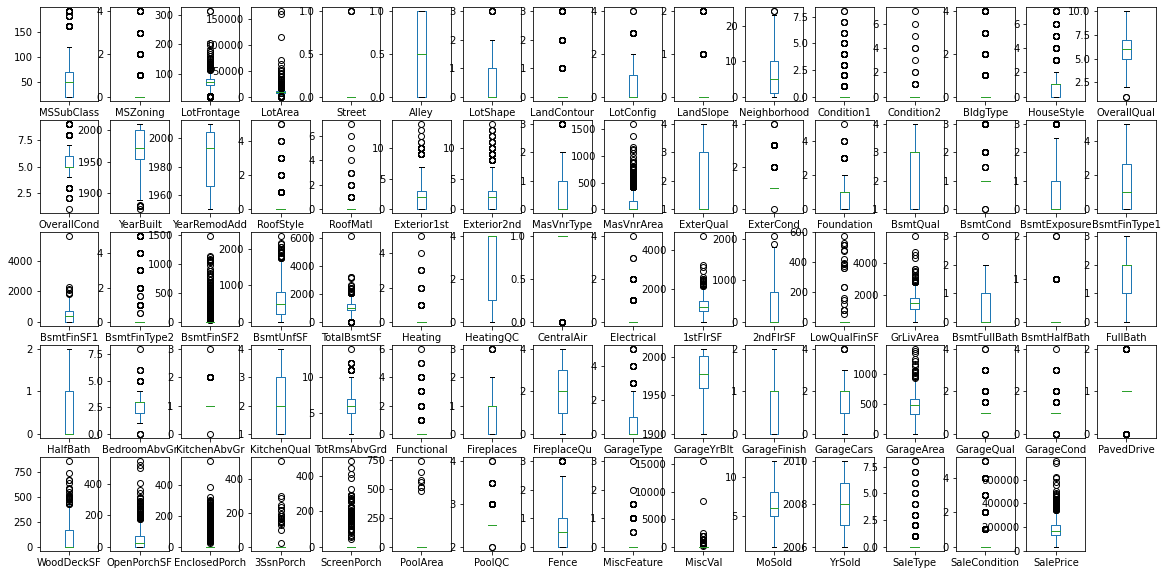

In [224]:
axs = df_train_new.plot(kind='box',subplots=True,figsize=(20,10),layout=(5,16))

In [469]:
df_train_new.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0.0        20.0       0.0         21.0    1300.0     0.0    0.0       0.0   
0.1        20.0       0.0         47.0    5298.3     0.0    0.0       0.0   
0.2        20.0       0.0         55.0    7167.2     0.0    0.0       0.0   
0.3        20.0       0.0         60.0    8125.0     0.0    0.0       0.0   
0.4        30.0       0.0         65.0    8831.2     0.0    0.5       0.0   
0.5        50.0       0.0         70.0    9522.5     0.0    0.5       0.0   
0.6        60.0       0.0         75.0   10193.0     0.0    0.5       0.0   
0.7        60.0       0.0         80.0   11029.0     0.0    0.5       1.0   
0.8        80.0       1.0         85.0   12222.4     0.0    1.0       1.0   
0.9       120.0       1.0         96.5   14311.4     0.0    1.0       1.0   
1.0       190.0       4.0        313.0  164660.0     1.0    1.0       3.0   

     LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0.0          0.0        0.0        0.0           0.0         0.0         0.0   
0.1          0.0        0.0        0.0           0.0         0.0         0.0   
0.2          0.0        0.0        0.0           1.0         0.0         0.0   
0.3          0.0        0.0        0.0           2.0         0.0         0.0   
0.4          0.0        0.0        0.0           3.0         0.0         0.0   
0.5          0.0        0.0        0.0           5.0         0.0         0.0   
0.6          0.0        0.0        0.0           7.0         0.0         0.0   
0.7          0.0        0.0        0.0           9.0         0.0         0.0   
0.8          0.0        1.0        0.0          12.0         0.0         0.0   
0.9          1.0        1.0        0.0          16.0         1.0         0.0   
1.0          3.0        4.0        2.0          24.0         8.0         7.0   

     BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0.0       0.0         0.0          1.0          1.0     1875.0        1950.0   
0.1       0.0         0.0          5.0          5.0     1924.0        1950.0   
0.2       0.0         0.0          5.0          5.0     1948.0        1961.0   
0.3       0.0         0.0          5.0          5.0     1957.0        1970.0   
0.4       0.0         0.0          6.0          5.0     1965.0        1980.0   
0.5       0.0         1.0          6.0          5.0     1972.0        1993.0   
0.6       0.0         1.0          6.0          5.0     1982.0        1998.2   
0.7       0.0         1.0          7.0          6.0     1997.0        2002.0   
0.8       0.0         1.0          7.0          7.0     2003.0        2005.0   
0.9       1.0         2.0          8.0          7.0     2006.0        2007.0   
1.0       4.0         7.0         10.0          9.0     2010.0        2010.0   

     RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0.0        0.0       0.0          0.0          0.0         0.0         0.0   
0.1        0.0       0.0          0.0          0.0         0.0         0.0   
0.2        0.0       0.0          0.0          0.0         0.0         0.0   
0.3        0.0       0.0          0.0          0.0         0.0         0.0   
0.4        0.0       0.0          1.0          1.0         0.0         0.0   
0.5        0.0       0.0          2.0          2.0         0.0         0.0   
0.6        0.0       0.0          2.0          2.0         1.0        16.0   
0.7        0.0       0.0          3.0          3.0         1.0       113.9   
0.8        1.0       0.0          4.0          4.0         1.0       202.6   
0.9        1.0       0.0          5.0          5.0         1.0       321.2   
1.0        5.0       7.0         14.0         14.0         3.0      1600.0   

     ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0.0        1.0        0.0         0.0       1.0       0.0           0.0   
0.1        1.0        1.0         0.0       1.0       1.0           0.0

In [470]:
df_train_new['MSSubClass']=np.where(df_train_new['MSSubClass']>120.0,120.0,df_train_new['MSSubClass'])
print(df_train_new['MSSubClass'].skew())

0.7237032283615421


In [471]:
df_train_new['MSZoning']=np.where(df_train_new['MSZoning']>1,1,df_train_new['MSZoning'])
print(df_train_new['MSZoning'].skew())

1.4597118318532567


In [472]:
df_train_new['LotFrontage']=np.where(df_train_new['LotFrontage']<47.0,47.0,df_train_new['LotFrontage'])
df_train_new['LotFrontage']=np.where(df_train_new['LotFrontage']>96.5,96.5,df_train_new['LotFrontage'])
print(df_train_new['LotFrontage'].skew())

0.13143554119105857


In [473]:
df_train_new['LotArea']=np.where(df_train_new['LotArea']<5298.3,5298.3,df_train_new['LotArea'])
df_train_new['LotArea']=np.where(df_train_new['LotArea']>14311.4,14311.4,df_train_new['LotArea'])
print(df_train_new['LotArea'].skew())

0.13022197176194655


In [474]:
df_train_new['LotConfig']=np.where(df_train_new['LotConfig']>1.0,1.0,df_train_new['LotConfig'])
print(df_train_new['LotConfig'].skew())

0.9861503991310753


In [475]:
df_train_new['Condition1']=np.where(df_train_new['Condition1']>1.0,1.0,df_train_new['Condition1'])
print(df_train_new['Condition1'].skew())

2.0830205639783603


In [476]:
df_train_new['Condition2']=np.where(df_train_new['Condition2']>0.0,0.0,df_train_new['Condition2'])
print(df_train_new['Condition2'].skew())

0


In [477]:
df_train_new['BldgType']=np.where(df_train_new['BldgType']>1.0,1.0,df_train_new['BldgType'])
print(df_train_new['BldgType'].skew())

1.856194555374175


In [478]:
df_train_new['HouseStyle']=np.where(df_train_new['HouseStyle']>2.0,2.0,df_train_new['HouseStyle'])
print(df_train_new['HouseStyle'].skew())

0.5732875225729338


In [479]:
df_train_new['OverallQual']=np.where(df_train_new['OverallQual']<5,5,df_train_new['OverallQual'])
print(df_train_new['OverallQual'].skew())

0.7696748889776076


In [480]:
df_train_new['OverallCond']=np.where(df_train_new['OverallCond']<5,5,df_train_new['OverallCond'])
print(df_train_new['OverallCond'].skew())

1.3174371898830979


In [481]:
df_train_new['RoofStyle']=np.where(df_train_new['RoofStyle']>1.0,1.0,df_train_new['RoofStyle'])
print(df_train_new['RoofStyle'].skew())

1.3776708864674077


In [482]:
df_train_new['RoofMatl']=np.where(df_train_new['RoofMatl']>0.0,0.0,df_train_new['RoofMatl'])
print(df_train_new['RoofMatl'].skew())

0


In [483]:
df_train_new['Exterior1st']=np.where(df_train_new['Exterior1st']>5.0,5.0,df_train_new['Exterior1st'])
print(df_train_new['Exterior1st'].skew())

0.4910876126278449


In [484]:
df_train_new['Exterior2nd']=np.where(df_train_new['Exterior2nd']>5.0,5.0,df_train_new['Exterior2nd'])
print(df_train_new['Exterior2nd'].skew())

0.4184314869290665


In [485]:
df_train_new['MasVnrArea']=np.where(df_train_new['MasVnrArea']>321.2,321.2,df_train_new['MasVnrArea'])
print(df_train_new['MasVnrArea'].skew())

1.08778443184445


In [486]:
df_train_new['ExterCond']=np.where(df_train_new['ExterCond']>1.0,1.0,df_train_new['ExterCond'])
print(df_train_new['ExterCond'].skew())

-34.17601498127014


In [487]:
df_train_new['BsmtCond']=np.where(df_train_new['BsmtCond']>0.0,0.0,df_train_new['BsmtCond'])
print(df_train_new['BsmtCond'].skew())

0


In [488]:
df_train_new['BsmtFinSF1']=np.where(df_train_new['BsmtFinSF1']>1070.3,1070.3,df_train_new['BsmtFinSF1'])
print(df_train_new['BsmtFinSF1'].skew())

0.34855628344455675


In [489]:
df_train_new['BsmtFinType2']=np.where(df_train_new['BsmtFinType2']>1.0,1.0,df_train_new['BsmtFinType2'])
print(df_train_new['BsmtFinType2'].skew())

2.3437322161262477


In [490]:
df_train_new['TotalBsmtSF']=np.where(df_train_new['TotalBsmtSF']<641.9,641.9,df_train_new['TotalBsmtSF'])
df_train_new['TotalBsmtSF']=np.where(df_train_new['TotalBsmtSF']>1594.3,1594.3,df_train_new['TotalBsmtSF'])
print(df_train_new['TotalBsmtSF'].skew())

0.40456946921095244


In [491]:
df_train_new['Heating']=np.where(df_train_new['Heating']>0.0,0.0,df_train_new['Heating'])
print(df_train_new['Heating'].skew())

0


In [492]:
df_train_new['Electrical']=np.where(df_train_new['Electrical']>0.0,0.0,df_train_new['Electrical'])
print(df_train_new['Electrical'].skew())

0


In [493]:
df_train_new['1stFlrSF']=np.where(df_train_new['1stFlrSF']>1680.0,1680.0,df_train_new['1stFlrSF'])
print(df_train_new['1stFlrSF'].skew())

0.22896673472198295


In [494]:
df_train_new['2ndFlrSF']=np.where(df_train_new['2ndFlrSF']>975.6,975.6,df_train_new['2ndFlrSF'])
print(df_train_new['2ndFlrSF'].skew())

0.5349173193148716


In [495]:
df_train_new['LowQualFinSF']=np.where(df_train_new['LowQualFinSF']>0.0,0.0,df_train_new['LowQualFinSF'])
print(df_train_new['LowQualFinSF'].skew())

0


In [496]:
df_train_new['GrLivArea']=np.where(df_train_new['GrLivArea']<912.0,912.0,df_train_new['GrLivArea'])
df_train_new['GrLivArea']=np.where(df_train_new['GrLivArea']>2175.3,2175.3,df_train_new['GrLivArea'])
print(df_train_new['GrLivArea'].skew())

0.22761105410057342


In [497]:
df_train_new['BsmtHalfBath']=np.where(df_train_new['BsmtHalfBath']>0.0,0.0,df_train_new['BsmtHalfBath'])
print(df_train_new['BsmtHalfBath'].skew())

0


In [498]:
df_train_new['TotRmsAbvGrd']=np.where(df_train_new['TotRmsAbvGrd']<5.0,5.0,df_train_new['TotRmsAbvGrd'])
df_train_new['TotRmsAbvGrd']=np.where(df_train_new['TotRmsAbvGrd']>9.0,9.0,df_train_new['TotRmsAbvGrd'])
print(df_train_new['TotRmsAbvGrd'].skew())

0.4636465575322993


In [499]:
df_train_new['Functional']=np.where(df_train_new['Functional']>0.0,0.0,df_train_new['Functional'])
print(df_train_new['Functional'].skew())

0


In [500]:
df_train_new['GarageType']=np.where(df_train_new['GarageType']>1.0,1.0,df_train_new['GarageType'])
print(df_train_new['GarageType'].skew())

0.43325851451771896


In [501]:
df_train_new['GarageArea']=np.where(df_train_new['GarageArea']<240.0,240.0,df_train_new['GarageArea'])
df_train_new['GarageArea']=np.where(df_train_new['GarageArea']>760.1,760.1,df_train_new['GarageArea'])
print(df_train_new['GarageArea'].skew())

0.15842023435401065


In [502]:
df_train_new['GarageQual']=np.where(df_train_new['GarageQual']>0.0,0.0,df_train_new['GarageQual'])
print(df_train_new['GarageQual'].skew())

0


In [503]:
df_train_new['GarageCond']=np.where(df_train_new['GarageCond']>0.0,0.0,df_train_new['GarageCond'])
print(df_train_new['GarageCond'].skew())

0


In [504]:
df_train_new['PavedDrive']=np.where(df_train_new['PavedDrive']>0.0,0.0,df_train_new['PavedDrive'])
print(df_train_new['PavedDrive'].skew())

0


In [505]:
df_train_new['WoodDeckSF']=np.where(df_train_new['WoodDeckSF']>261.3,261.3,df_train_new['WoodDeckSF'])
print(df_train_new['WoodDeckSF'].skew())

0.5947531574149362


In [506]:
df_train_new['OpenPorchSF']=np.where(df_train_new['OpenPorchSF']>132.0,132.0,df_train_new['OpenPorchSF'])
print(df_train_new['OpenPorchSF'].skew())

0.8594935090882456


In [507]:
df_train_new['3SsnPorch']=np.where(df_train_new['3SsnPorch']>0.0,0.0,df_train_new['3SsnPorch'])
print(df_train_new['3SsnPorch'].skew())

0


In [508]:
df_train_new['ScreenPorch']=np.where(df_train_new['ScreenPorch']>0.0,0.0,df_train_new['ScreenPorch'])
print(df_train_new['ScreenPorch'].skew())

0


In [509]:
df_train_new['PoolArea']=np.where(df_train_new['PoolArea']>0.0,0.0,df_train_new['PoolArea'])
print(df_train_new['PoolArea'].skew())

0


In [510]:
df_train_new['MiscVal']=np.where(df_train_new['MiscVal']>0.0,0.0,df_train_new['MiscVal'])
print(df_train_new['MiscVal'].skew())

0


In [511]:
df_train_new['SaleType']=np.where(df_train_new['SaleType']>1.0,1.0,df_train_new['SaleType'])
print(df_train_new['SaleType'].skew())

2.02260136008938


In [512]:
df_train_new['SaleCondition']=np.where(df_train_new['SaleCondition']>1.0,1.0,df_train_new['SaleCondition'])
print(df_train_new['SaleCondition'].skew())

1.5748063626070203


In [513]:
df_train_new['SalePrice']=np.where(df_train_new['SalePrice']<107500.0,107500.0,df_train_new['SalePrice'])
df_train_new['SalePrice']=np.where(df_train_new['SalePrice']>277650.0,277650.0,df_train_new['SalePrice'])
print(df_train_new['SalePrice'].skew())

0.5724421694064236


In [514]:
#after outliers removal those columns which have 0 variance
df_train_new.drop(columns=['Condition2','RoofMatl','BsmtCond','Heating','Electrical','LowQualFinSF','BsmtHalfBath','Functional','GarageQual','GarageCond','PavedDrive','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

In [515]:
#dataset shape after outlier removal
df_train_new.shape

(1168, 64)

In [516]:
#checking skewness of dataset
df_train_new.skew()

MSSubClass        0.723703
MSZoning          1.459712
LotFrontage       0.131436
LotArea           0.130222
Street           17.021969
Alley             0.111171
LotShape          1.235171
LandContour       3.395943
LotConfig         0.986150
LandSlope         4.812568
Neighborhood      0.812269
Condition1        2.083021
BldgType          1.856195
HouseStyle        0.573288
OverallQual       0.769675
OverallCond       1.317437
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.377671
Exterior1st       0.491088
Exterior2nd       0.418431
MasVnrType        1.215653
MasVnrArea        1.087784
ExterQual         0.610472
ExterCond       -34.176015
Foundation        1.148164
BsmtQual          0.121556
BsmtExposure      1.174388
BsmtFinType1      0.761457
BsmtFinSF1        0.348556
BsmtFinType2      2.343732
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       0.404569
HeatingQC        -0.552469
CentralAir       -3.475188
1stFlrSF          0.228967
2

Standardization

In [517]:
#from sklearn.preprocessing import RobustScaler
#rc=RobustScaler(with_centering=True,with_scaling=True,quantile_range=(25.0,75.0),copy=True,)
#rc.fit(df_train_new)
#df_norm=pd.DataFrame(rc.transform(df_train_new),index=df_train_new.index,columns=df_train_new.columns)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_train_new)
df_norm=pd.DataFrame(sc.transform(df_train_new),index=df_train_new.index,columns=df_train_new.columns)

In [518]:
x=df_norm.drop(columns=['SalePrice'])
x=pd.DataFrame(x,columns=x.columns)

In [519]:
y=df_norm['SalePrice']

Feature selection using PCA

In [520]:
from sklearn.decomposition import PCA

In [521]:
pca=PCA(n_components=40)
pca.fit_transform(x.values)
print(pca.explained_variance_ratio_)

[0.17768521 0.07010141 0.06160021 0.04513308 0.04060831 0.0330438
 0.02753191 0.02708484 0.02493067 0.02284916 0.02143543 0.0201582
 0.01953555 0.01810997 0.01755749 0.01692621 0.01625206 0.0159019
 0.01555053 0.01520995 0.01499695 0.01452685 0.01424796 0.0134876
 0.01301711 0.01261423 0.01175779 0.01149067 0.0109945  0.01066478
 0.01036935 0.00984655 0.0095785  0.00883947 0.00874352 0.00839544
 0.00790528 0.00785899 0.00722598 0.00656326]


In [522]:
def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    index=np.arange(num_components)
    values=pca.explained_variance_ratio_

    #define the graph
    plt.figure(figsize=(18,6))
    ax=plt.subplot(111)
    cumulative=np.cumsum(values)

    ax.bar(index,values)
    ax.plot(index,cumulative)

    #add annotation to our graph

    for val in range(num_components):
        ax.annotate(r"%s" % ((str(values[val]*100)[:3])),(index[val],values[val]),va='bottom',ha='center',fontsize=16)
    
    # setting tick parameters
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=3,length=15)
    
    #labeling x and y axis
    ax.set_xlabel('Principal Component Values')
    ax.set_ylabel('Variance Explained Percentage')
    plt.title('Scree plot of variance explained ratio for each principal component')

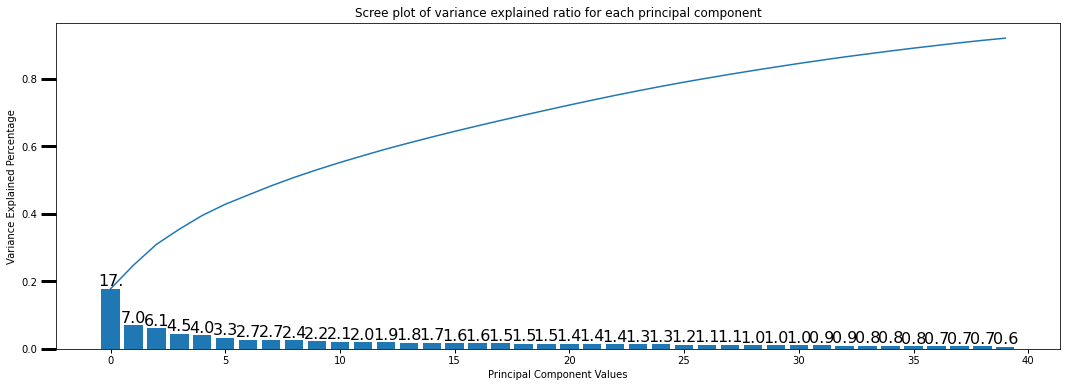

In [523]:
scree_plot(pca)

I have finally selected 40 principal components after analyzing Scree plot. I aimed to get overall variance of atleast approx 90 and it was quite done by selecting 40 principal components  

In [524]:
pca=PCA(n_components=40)
x=pca.fit_transform(x)
x=pd.DataFrame(x)

In [525]:
#importing models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [122]:
!pip install xgboost

In [707]:
import xgboost
print(xgboost.__version__)

1.4.1


In [526]:
from xgboost import XGBRegressor

In [708]:
!pip install lightgbm

In [123]:
import lightgbm
print(lightgbm.__version__)

3.2.1


In [527]:
from lightgbm import LGBMRegressor

In [528]:
from sklearn.ensemble import GradientBoostingRegressor

In [529]:
from sklearn.ensemble import RandomForestRegressor

# Model Train-Test and Performance Evaluation

In [530]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    xg=XGBRegressor(objective='reg:squarederror')
    lg=LGBMRegressor()
    clf=GradientBoostingRegressor(n_estimators=100,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')
    model=[lr,xg,lg,clf]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state        
            print('max r2 score corresponding to ',m,'for',final_r_state,'is',max_r_score)

max r2 score corresponding to  LinearRegression() for 42 is 0.8554176588488264
max r2 score corresponding to  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) for 42 is 0.8716988796065281
max r2 score corresponding to  LGBMRegressor() for 42 is 0.8873643255610928
max r2 score corresponding to  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', in

In [531]:
print('x_train %s\nx_test %s' % (x_train.shape, x_test.shape))

x_train (934, 40)
x_test (234, 40)


Model hyperparameters tuning using RandomizedSearchCV

In [288]:
from sklearn.model_selection import RandomizedSearchCV
param ={'num_leaves': [6,12,18,36,50], 
             'min_child_samples': [100,200,300,400,500]}
m=lg
grid=RandomizedSearchCV(m,param,n_iter =10, cv=9, random_state=84)
grid.fit(x,y)
print(grid.best_score_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(grid.best_params_)

0.8759601887984308
0.915738972244728
0.08679195036206899
0.2946047358106604
{'num_leaves': 36, 'min_child_samples': 100}


In [289]:
from sklearn.model_selection import RandomizedSearchCV
param_tuning = {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']}
m=xg
grid=RandomizedSearchCV(m,param_tuning,n_iter =10, cv=9, random_state=42)
grid.fit(x,y)
print(grid.best_score_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(grid.best_params_)

0.8894637068212526
0.915738972244728
0.08679195036206899
0.2946047358106604
{'subsample': 0.5, 'objective': 'reg:squarederror', 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [290]:
from sklearn.model_selection import RandomizedSearchCV
param_test = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),'n_estimators' : [100, 200, 500],'learning_rate': [0.01, 0.1]}
m=clf
grid=RandomizedSearchCV(m,param_test,n_iter =10, cv=9, random_state=43)
grid.fit(x,y)
print(grid.best_score_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(grid.best_params_)

0.8897149959346228
0.915738972244728
0.08679195036206899
0.2946047358106604
{'n_estimators': 100, 'min_samples_split': 200, 'max_depth': 13, 'learning_rate': 0.1}


Applying best parameters to models to get final results

In [291]:
xgbregressor=XGBRegressor(subsample= 0.5,objective='reg:squarederror',n_estimators=500,min_child_weight=3,max_depth=5,learning_rate=0.01,colsample_bytree=0.7)
lgbmregressor=LGBMRegressor(num_leaves=36,min_child_samples=100)
gradientbregressor=GradientBoostingRegressor(n_estimators=100, min_samples_split=200, max_depth=13,learning_rate=0.1)

model=[xgbregressor,lgbmregressor,gradientbregressor]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predm))
    print('MSE of',m,'is:')
    print(mean_squared_error(y_test,predm))
    print('RMSE of',m,'is:')
    print(np.sqrt(mean_squared_error(y_test,predm)))
    print('\n\n')

r2_score of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None) is:
0.9185165960702546
MSE of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, n

From above results we observe that xgbregressor is performing better than LGBMRegressor and GradientBoostingRegressor

In [986]:
!pip install yellowbrick

Elbow method using k-means to find optimal no of clusters to get best CV scores

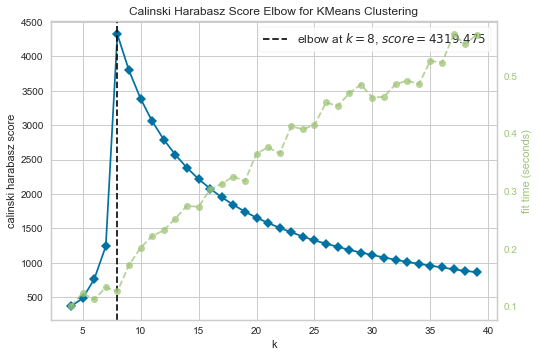

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [133]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
x, y = make_blobs(n_samples=1000, n_features=40, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,40), metric='calinski_harabasz', timings=True
)

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [292]:
from sklearn.model_selection import cross_val_score
model=[xgbregressor,lgbmregressor,gradientbregressor]
for m in model:
    scores=cross_val_score(m,x,y,cv=15)
    print(scores)
    print(scores.mean(),scores.std())
    print('\n\n')

[0.87022569 0.91187659 0.90155186 0.92178497 0.91901133 0.87817839
 0.91873741 0.7790251  0.89548306 0.92525709 0.87725554 0.87529315
 0.89572485 0.89594179 0.9044882 ]
0.8913223346761929 0.03467911123364326



[0.85302823 0.90645094 0.88761382 0.91978805 0.89351478 0.86982641
 0.888883   0.77422548 0.87999478 0.90409427 0.88416947 0.85863242
 0.87592155 0.88382664 0.90042756]
0.878693158989663 0.03276067966505761



[0.85656965 0.91435641 0.90021317 0.9153188  0.90182106 0.82435766
 0.92307151 0.79140283 0.87397077 0.92613006 0.89419233 0.86820106
 0.887437   0.89903584 0.92697428]
0.8868701621625056 0.03749081248260618





From above CV scores and Std also we observe that the overall performance of xgbregressor is better than its counterparts

While evaluating xgbregressor model on new test data I found that the model is overfitting as it is performing good on train data but performing poor on test data. To stop overfitting of the model here I have employed two techniques as Regularization and Early Stoping. 

1) Early Stoping

In [402]:
model1 = XGBRegressor()
eval_set = [(x_test, y_test)]
model1.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
y_pred = model1.predict(x_test)
r2_score = r2_score(y_test, y_pred)
print("r2_score: %.2f%%" % (r2_score * 100.0))

[0]	validation_0-logloss:-0.91800
[1]	validation_0-logloss:-15.69070
[2]	validation_0-logloss:-17.23660
[3]	validation_0-logloss:-17.69670
[4]	validation_0-logloss:-17.82682
[5]	validation_0-logloss:-17.97800
[6]	validation_0-logloss:-18.01352
[7]	validation_0-logloss:-17.89926
[8]	validation_0-logloss:-17.92949
[9]	validation_0-logloss:-17.97115
[10]	validation_0-logloss:-18.07282
[11]	validation_0-logloss:-18.00032
[12]	validation_0-logloss:-18.04130
[13]	validation_0-logloss:-18.04804
[14]	validation_0-logloss:-18.02856
[15]	validation_0-logloss:-18.04124
[16]	validation_0-logloss:-18.01088
[17]	validation_0-logloss:-17.94015
[18]	validation_0-logloss:-17.95313
[19]	validation_0-logloss:-17.94118
r2_score: 89.41%


2) Regularization

In [293]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
lasso_reg=Lasso(alpha=0.0001)
ridge_reg=Ridge(alpha=0.0001)
elasticnet_reg=ElasticNet(alpha=0.0001)
model=[lasso_reg,ridge_reg,elasticnet_reg]

for m in model:
    m.fit(x_train,y_train)
    predreg=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predreg))
    print('model score of',m,'is:')
    print(m.score(x_train,y_train))
    print('MSE of',m,'is:')
    print(mean_squared_error(y_test,predreg))
    print('RMSE of',m,'is:')
    print(np.sqrt(mean_squared_error(y_test,predreg)))
    print('\n\n')

r2_score of Lasso(alpha=0.0001) is:
0.8923257889802236
model score of Lasso(alpha=0.0001) is:
0.8710633443025892
MSE of Lasso(alpha=0.0001) is:
0.11090838822006491
RMSE of Lasso(alpha=0.0001) is:
0.3330291101691636



r2_score of Ridge(alpha=0.0001) is:
0.8922721253633898
model score of Ridge(alpha=0.0001) is:
0.8710638036935432
MSE of Ridge(alpha=0.0001) is:
0.11096366371447272
RMSE of Ridge(alpha=0.0001) is:
0.3331120888146702



r2_score of ElasticNet(alpha=0.0001) is:
0.8922993787966436
model score of ElasticNet(alpha=0.0001) is:
0.8710636832378307
MSE of ElasticNet(alpha=0.0001) is:
0.1109355916782163
RMSE of ElasticNet(alpha=0.0001) is:
0.3330699501279218





In [294]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':(np.logspace(-4,0,30))}
model=[Ridge(),Lasso(),ElasticNet()]
for m in model:
    grid=GridSearchCV(estimator=m,param_grid=alphavalue)
    grid.fit(x,y)
    print(grid.best_score_)
    print(grid.best_params_)
    print('\n')

0.8630102946993761
{'alpha': 1.0}


0.8668613235473689
{'alpha': 0.006210169418915616}


0.8668874990855036
{'alpha': 0.011721022975334805}




In [295]:
lasso_reg2=Lasso(alpha=0.006210169418915616)
ridge_reg2=Ridge(alpha=1)
elasticnet_reg2=ElasticNet(alpha=0.011721022975334805)
model=[lasso_reg2,ridge_reg2,elasticnet_reg2]

for m in model:
    m.fit(x_train,y_train)
    predreg2=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predreg2))
    print('model score of',m,'is:')
    print(m.score(x_train,y_train))
    print('MSE of',m,'is:')
    print(mean_squared_error(y_test,predreg2))
    print('RMSE of',m,'is:')
    print(np.sqrt(mean_squared_error(y_test,predreg2)))
    print('\n\n')

r2_score of Lasso(alpha=0.006210169418915616) is:
0.8940880174575809
model score of Lasso(alpha=0.006210169418915616) is:
0.8696575972162899
MSE of Lasso(alpha=0.006210169418915616) is:
0.10909322822726678
RMSE of Lasso(alpha=0.006210169418915616) is:
0.33029264028625704



r2_score of Ridge(alpha=1) is:
0.892278269071489
model score of Ridge(alpha=1) is:
0.8710637476228967
MSE of Ridge(alpha=1) is:
0.11095733546970074
RMSE of Ridge(alpha=1) is:
0.33310259000749415



r2_score of ElasticNet(alpha=0.011721022975334805) is:
0.8940097823305253
model score of ElasticNet(alpha=0.011721022975334805) is:
0.8697529497670706
MSE of ElasticNet(alpha=0.011721022975334805) is:
0.10917381327880107
RMSE of ElasticNet(alpha=0.011721022975334805) is:
0.330414608149823





In [297]:
#xgbregressor
xgbregressor.fit(x_train,y_train)
predxgb=xgbregressor.predict(x_test)

In [296]:
#lasso regularization
lasso_reg2.fit(x_train,y_train)
predlsreg2=lasso_reg2.predict(x_test)

In [403]:
#early stoping xgbregressor
model1.fit(x_train,y_train)
predxgbest=model1.predict(x_test)

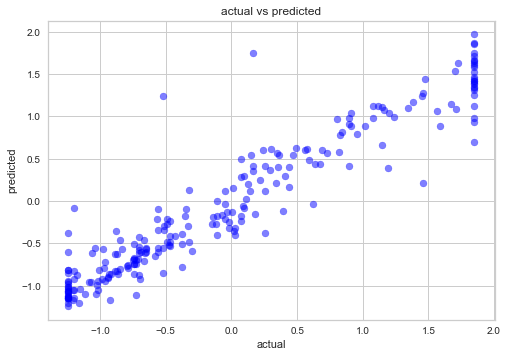

In [1258]:
import warnings
warnings.filterwarnings('ignore')
plt.scatter(y_test, predxgb, color='blue', alpha=0.5)
plt.title("actual vs predicted")
plt.legend(loc='best')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

Saving all three models for the performance evaluation on test data

In [298]:
import joblib
file='HousingXgb.pkl'
joblib.dump(xgbregressor,file)

['HousingXgb.pkl']

In [299]:
import joblib
file='Housinglsreg2.pkl'
joblib.dump(lasso_reg2,file)

['Housinglsreg2.pkl']

In [404]:
import joblib
file='HousingXgbest.pkl'
joblib.dump(model1,file)

['HousingXgbest.pkl']

In [300]:
#Loading test data
df_test=pd.read_csv('Test.csv')

In [301]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [302]:
df_test.shape

(292, 80)

In [303]:
duplicate_rows=df_test[df_test.duplicated()]
print(duplicate_rows.shape)

(0, 80)


In [304]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [305]:
for column in df_test.columns:
    if df_test[column].dtypes==object:
        print(str(column)+':'+str(df_test[column].unique()))
        print(df_test[column].value_counts())
        print('************************************************************************************************************')
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'C (all)']
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
************************************************************************************************************


Street:['Pave' 'Grvl']
Pave    290
Grvl      2
Name: Street, dtype: int64
************************************************************************************************************


Alley:[nan 'Grvl' 'Pave']
Grvl    9
Pave    5
Name: Alley, dtype: int64
************************************************************************************************************


LotShape:['IR1' 'Reg' 'IR3' 'IR2']
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
************************************************************************************************************


LandContour:['HLS' 'Lvl' 'Bnk' 'Low']
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64
***************************************************************

In [306]:
df_test['Alley']=df_test.Alley.map({'Grvl':0,'Pave':1})

In [307]:
df_test['LotShape']=df_test.LotShape.map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [308]:
df_test['LandContour']=df_test.LandContour.map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})

In [309]:
df_test['LotConfig']=df_test.LotConfig.map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})

In [310]:
df_test['LandSlope']=df_test.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})

In [311]:
df_test['Neighborhood']=df_test.Neighborhood.map({'NAmes':0,'CollgCr':1,'OldTown':2,'Edwards':3,'Somerst':4,'Gilbert':5,'NridgHt':6,'Sawyer':7,'NWAmes':8,'SawyerW':9,'BrkSide':10,'Crawfor':11,'NoRidge':12,'Mitchel':13,'IDOTRR':14,'Timber':15,'ClearCr':16,'SWISU':17,'StoneBr':18,'Blmngtn':19,'BrDale':20,'Veenker':21,'MeadowV':22,'NPkVill':23})

In [312]:
df_test['Condition1']=df_test.Condition1.map({'Norm':0,'Feedr':1,'Artery':2,'RRAn':3,'PosN':4,'RRAe':5,'PosA':6,'RRNn':7})

In [313]:
df_test['Condition2']=df_test.Condition2.map({'Norm':0,'RRNn':7})

In [314]:
df_test['BldgType']=df_test.BldgType.map({'1Fam':0,'TwnhsE':1,'Duplex':2,'Twnhs':3,'2fmCon':4})

In [315]:
df_test['HouseStyle']=df_test.HouseStyle.map({'1Story':0,'2Story':1,'1.5Fin':2,'SLvl':3,'SFoyer':4,'1.5Unf':5,'2.5Unf':6,'2.5Fin':7})

In [316]:
df_test['RoofStyle']=df_test.RoofStyle.map({'Gable':0,'Hip':1,'Flat':2,'Gambrel':3,'Mansard':4})

In [317]:
df_test['RoofMatl']=df_test.RoofMatl.map({'CompShg':0,'Tar&Grv':1,'WdShake':3})

In [318]:
df_test['Exterior1st']=df_test.Exterior1st.map({'VinylSd':0,'HdBoard':1,'MetalSd':2,'Wd Sdng':3,'Plywood':4,'CemntBd':5,'BrkFace':6,'Stucco':7,'AsbShng':8,'AsbShng':9,'WdShing':10,'BrkComm':13})

In [319]:
df_test['Exterior2nd']=df_test.Exterior2nd.map({'VinylSd':0,'MetalSd':1,'HdBoard':2,'Wd Sdng':3,'Plywood':4,'CmentBd':5,'Wd Shng':6,'Stucco':7,'BrkFace':8,'AsbShng':9,'ImStucc':10,'Brk Cmn':11,'Stone':12})

In [320]:
df_test['MasVnrType']=df_test.MasVnrType.map({'None':0,'BrkFace':1,'Stone':2,'BrkCmn':3})

In [321]:
df_test['ExterQual']=df_test.ExterQual.map({'TA':1,'Gd':3,'Ex':4,'Fa':2})

In [322]:
df_test['ExterCond']=df_test.ExterCond.map({'TA':1,'Gd':3,'Fa':2,'Ex':4,'Po':0})

In [323]:
df_test['Foundation']=df_test.Foundation.map({'CBlock':0,'PConc':1,'BrkTil':2,'Slab':3,'Stone':4,'Wood':5})

In [324]:
df_test['BsmtQual']=df_test.BsmtQual.map({'TA':1,'Gd':3,'Ex':4,'Fa':2})

In [325]:
df_test['BsmtCond']=df_test.BsmtCond.map({'TA':1,'Gd':3,'Fa':2,'Po':0})

In [326]:
df_test['BsmtExposure']=df_test.BsmtExposure.map({'No':0,'Gd':3,'Av':2,'Mn':1})

In [327]:
df_test['BsmtFinType1']=df_test.BsmtFinType1.map({'Unf':0,'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5})

In [328]:
df_test['BsmtFinType2']=df_test.BsmtFinType2.map({'Unf':0,'Rec':1,'LwQ':2,'BLQ':3,'ALQ':4,'GLQ':5})

In [329]:
df_test['Heating']=df_test.Heating.map({'GasA':0,'GasW':1,'Grav':2,'Wall':3,'Floor':4,'OthW':5})

In [330]:
df_test['HeatingQC']=df_test.HeatingQC.map({'Ex':4,'TA':1,'Gd':3,'Fa':2,'Po':0})

In [331]:
df_test['CentralAir']=df_test.CentralAir.map({'Y':1,'N':0})

In [332]:
df_test['Electrical']=df_test.Electrical.map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})

In [333]:
df_test['Functional']=df_test.Functional.map({'Typ':0,'Min2':1,'Min1':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6})

In [334]:
df_test['KitchenQual']=df_test.KitchenQual.map({'TA':1,'Gd':3,'Ex':4,'Fa':2})

In [335]:
df_test['FireplaceQu']=df_test.FireplaceQu.map({'Gd':3,'TA':1,'Fa':2,'Ex':4,'Po':0})

In [336]:
df_test['GarageFinish']=df_test.GarageFinish.map({'Unf':0,'RFn':1,'Fin':2})

In [337]:
df_test['GarageType']=df_test.GarageType.map({'Attchd':0,'Detchd':1,'BuiltIn':2,'Basment':3,'CarPort':4,'2Types':5})

In [338]:
df_test['GarageQual']=df_test.GarageQual.map({'TA':1,'Fa':2,'Gd':3,'Ex':4,'Po':0})

In [339]:
df_test['GarageCond']=df_test.GarageCond.map({'TA':1,'Fa':2,'Gd':3,'Po':0,'Ex':4})

In [340]:
df_test['PavedDrive']=df_test.PavedDrive.map({'Y':1,'N':0,'P':2})

In [341]:
df_test['PoolQC']=df_test.PoolQC.map({'Gd':3,'Fa':2,'Ex':4})

In [342]:
df_test['Fence']=df_test.Fence.map({'MnPrv':0,'GdPrv':1,'GdWo':2,'MnWw':3})

In [343]:
df_test['MiscFeature']=df_test.MiscFeature.map({'Shed':0,'Gar2':1,'TenC':2,'Othr':3})

In [344]:
df_test['SaleType']=df_test.SaleType.map({'WD':0,'New':1,'COD':2,'ConLD':3,'ConLI':4,'ConLw':5,'CWD':6,'Oth':7,'Con':8})

In [345]:
df_test['SaleCondition']=df_test.SaleCondition.map({'Normal':0,'Partial':1,'Abnorml':2,'Family':3,'Alloca':4,'AdjLand':5})

In [346]:
df_test['MSZoning']=df_test.MSZoning.map({'RL':0,'RM':1,'FV':2,'RH':3,'C (all)':4})

In [347]:
df_test['Street']=df_test.Street.map({'Pave':0,'Grvl':1})

In [348]:
df_test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   337          20         0         86.0    14157       0    NaN         1   
1  1018         120         0          NaN     5814       0    NaN         1   
2   929          20         0          NaN    11838       0    NaN         0   
3  1148          70         0         75.0    12000       0    NaN         0   
4  1227          60         0         86.0    14598       0    NaN         1   

   LandContour Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            2    AllPub          1          0            18           0   
1            0    AllPub          2          0            18           0   
2            0    AllPub          0          0             1           0   
3            1    AllPub          0          0            11           0   
4            0    AllPub          2          0             4           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           0            9            5       2005   
1           0         1           0            8            5       1984   
2           0         0           0            8            5       2001   
3           0         0           1            7            7       1941   
4           0         0           1            6            5       2007   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2006          1         0          0.0          0.0         2.0   
1          1984          0         0          1.0          2.0         0.0   
2          2001          1         0          0.0          0.0         0.0   
3          1950          0         0          2.0          1.0         0.0   
4          2007          0         0          0.0          0.0         2.0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       200.0          3          1           1       4.0       1.0   
1         0.0          3          1           0       3.0       1.0   
2         0.0          3          1           1       3.0       1.0   
3         0.0          1          1           0       1.0       1.0   
4        74.0          3          1           1       3.0       1.0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0           3.0           1.0        1249           0.0           0   
1           2.0           1.0        1036           0.0           0   
2           2.0           0.0           0           0.0           0   
3           0.0           4.0         275           0.0           0   
4           1.0           0.0           0           0.0           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        673         1922        0          4           1         0.0   
1        184         1220        0          3           1         0.0   
2       1753         1753        0          4           1         0.0   
3        429          704        0          4           1         0.0   
4        894          894        0          4           1         0.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             1            3             8   
1         1         0             1             1            3             4   
2         2         0             3             1            4             7   
3         1         1             3             1          

In [349]:
df_test.drop(columns=['Id','Utilities'],inplace=True)

In [350]:
df_test.shape

(292, 78)

In [351]:
df_test['PoolQC']=df_test['PoolQC'].fillna(0)

In [352]:
imputer=KNNImputer(missing_values=np.NAN,n_neighbors=2)
df_test_new=imputer.fit_transform(df_test.values)
df_test_new=pd.DataFrame(df_test_new,columns=df_test.columns)
df_test_new.head(5)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        20.0       0.0         86.0  14157.0     0.0    0.5       1.0   
1       120.0       0.0         42.0   5814.0     0.0    0.5       1.0   
2        20.0       0.0         66.5  11838.0     0.0    0.5       0.0   
3        70.0       0.0         75.0  12000.0     0.0    0.5       0.0   
4        60.0       0.0         86.0  14598.0     0.0    0.5       1.0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          2.0        1.0        0.0          18.0         0.0         0.0   
1          0.0        2.0        0.0          18.0         0.0         0.0   
2          0.0        0.0        0.0           1.0         0.0         0.0   
3          1.0        0.0        0.0          11.0         0.0         0.0   
4          0.0        2.0        0.0           4.0         1.0         0.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         0.0          9.0          5.0     2005.0        2006.0   
1       1.0         0.0          8.0          5.0     1984.0        1984.0   
2       0.0         0.0          8.0          5.0     2001.0        2001.0   
3       0.0         1.0          7.0          7.0     1941.0        1950.0   
4       0.0         1.0          6.0          5.0     2007.0        2007.0   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        1.0       0.0          0.0          0.0         2.0       200.0   
1        0.0       0.0          1.0          2.0         0.0         0.0   
2        1.0       0.0          0.0          0.0         0.0         0.0   
3        0.0       0.0          2.0          1.0         0.0         0.0   
4        0.0       0.0          0.0          0.0         2.0        74.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        3.0        1.0         1.0       4.0       1.0           3.0   
1        3.0        1.0         0.0       3.0       1.0           2.0   
2        3.0        1.0         1.0       3.0       1.0           2.0   
3        1.0        1.0         0.0       1.0       1.0           0.0   
4        3.0        1.0         1.0       3.0       1.0           1.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           1.0      1249.0           0.0         0.0      673.0       1922.0   
1           1.0      1036.0           0.0         0.0      184.0       1220.0   
2           0.0         0.0           0.0         0.0     1753.0       1753.0   
3           4.0       275.0           0.0         0.0      429.0        704.0   
4           0.0         0.0           0.0         0.0      894.0        894.0   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0      0.0        4.0         1.0         0.0    1922.0       0.0   
1      0.0        3.0         1.0         0.0    1360.0       0.0   
2      0.0        4.0         1.0         0.0    1788.0       0.0   
3      0.0        4.0         1.0         0.0     860.0     704.0   
4      0.0        4.0         1.0         0.0     894.0    1039.0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0     1922.0           1.0           0.0       2.0       0.0   
1           0.0     1360.0           1.0           0.0       1.0       0.0   
2           0.0     1788.0           0.0           0.0       2.0       0.0   
3           0.0     1564.0           0.0           0.0       1.0       1.0   
4           0.0     1933.0           0.0           0.0       2.0       1.0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0           3.0           1.0          3.0           8.0         0.0   
1           1.0           1.0          3.0           4.0         0.0   
2           3.0           1.0          4.0           7.0         0.0   
3           3.0           1.0          2.0           7.0         

In [353]:
df_test_new.isnull().values.any()

False

In [354]:
df_test_new.describe()

MSSubClass    MSZoning  LotFrontage        LotArea      Street  \
count  292.000000  292.000000   292.000000     292.000000  292.000000   
mean    57.414384    0.291096    66.212329   10645.143836    0.006849   
std     43.780649    0.581079    21.296373   13330.669795    0.082618   
min     20.000000    0.000000    21.000000    1526.000000    0.000000   
25%     20.000000    0.000000    54.250000    7200.000000    0.000000   
50%     50.000000    0.000000    65.000000    9200.000000    0.000000   
75%     70.000000    0.000000    78.125000   11658.750000    0.000000   
max    190.000000    4.000000   150.000000  215245.000000    1.000000   

            Alley    LotShape  LandContour   LotConfig   LandSlope  \
count  292.000000  292.000000   292.000000  292.000000  292.000000   
mean     0.320205    0.424658     0.160959    0.482877    0.054795   
std      0.300691    0.624094     0.560544    0.890798    0.242576   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.000000     0.000000    0.000000    0.000000   
50%      0.500000    0.000000     0.000000    0.000000    0.000000   
75%      0.500000    1.000000     0.000000    1.000000    0.000000   
max      1.000000    3.000000     3.000000    4.000000    2.000000   

       Neighborhood  Condition1  Condition2    BldgType  HouseStyle  \
count    292.000000  292.000000  292.000000  292.000000   292.00000   
mean       6.856164    0.304795    0.023973    0.356164     0.84589   
std        6.316933    0.987679    0.409644    0.871383     1.14883   
min        0.000000    0.000000    0.000000    0.000000     0.00000   
25%        1.000000    0.000000    0.000000    0.000000     0.00000   
50%        5.000000    0.000000    0.000000    0.000000     0.00000   
75%       12.000000    0.000000    0.000000    0.000000     1.00000   
max       23.000000    7.000000    7.000000    4.000000     7.00000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   RoofStyle  \
count   292.000000   292.000000   292.000000    292.000000  292.000000   
mean      6.078767     5.493151  1972.616438   1985.294521    0.263699   
std       1.356147     1.063267    30.447016     20.105792    0.570450   
min       3.000000     3.000000  1872.000000   1950.000000    0.000000   
25%       5.000000     5.000000  1954.000000   1968.000000    0.000000   
50%       6.000000     5.000000  1976.000000   1994.000000    0.000000   
75%       7.000000     6.000000  2001.000000   2003.250000    0.000000   
max      10.000000     9.000000  2009.000000   2010.000000    4.000000   

         RoofMatl  Exterior1st  Exterior2nd  MasVnrType   MasVnrArea  \
count  292.000000   292.000000   292.000000  292.000000   292.000000   
mean     0.013699     1.880137     1.972603    0.539384   109.133562   
std      0.184867     2.358581     2.386806    0.704178   174.730247   
min      0.000000     0.000000     0.000000    0.000000     0.000000   
25%      0.000000     0.000000     0.000000    0.000000     0.000000   
50%      0.000000     1.000000     1.000000    0.000000     0.000000   
75%      0.000000     3.000000     3.000000    1.000000   180.000000   
max      3.000000    13.000000    12.000000    3.000000  1031.000000   

        ExterQual   ExterCond  Foundation    BsmtQual    BsmtCond  \
count  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     1.726027    1.215753    0.770548    2.131849    1.089041   
std      1.005282    0.624273    0.807241    1.109431    0.378480   
min      1.000000    1.000000    0.000000    1.000000    1.000000   
25%      1.000000    1.000000    0.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    3.000000    1.000000   
75%      3.000000    1.000000    1.000000    3.000000    1.000000   
max      4.000000    4.000000    5.000000    4.000000    3.000000   

       BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2  \
count    292.000000    292.000000   292.000000    292.000000   

In [355]:
df_test_new.drop(columns=['Condition2','RoofMatl','BsmtCond','Heating','Electrical','LowQualFinSF','BsmtHalfBath','Functional','GarageQual','GarageCond','PavedDrive','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

In [356]:
df_test_new.shape

(292, 63)

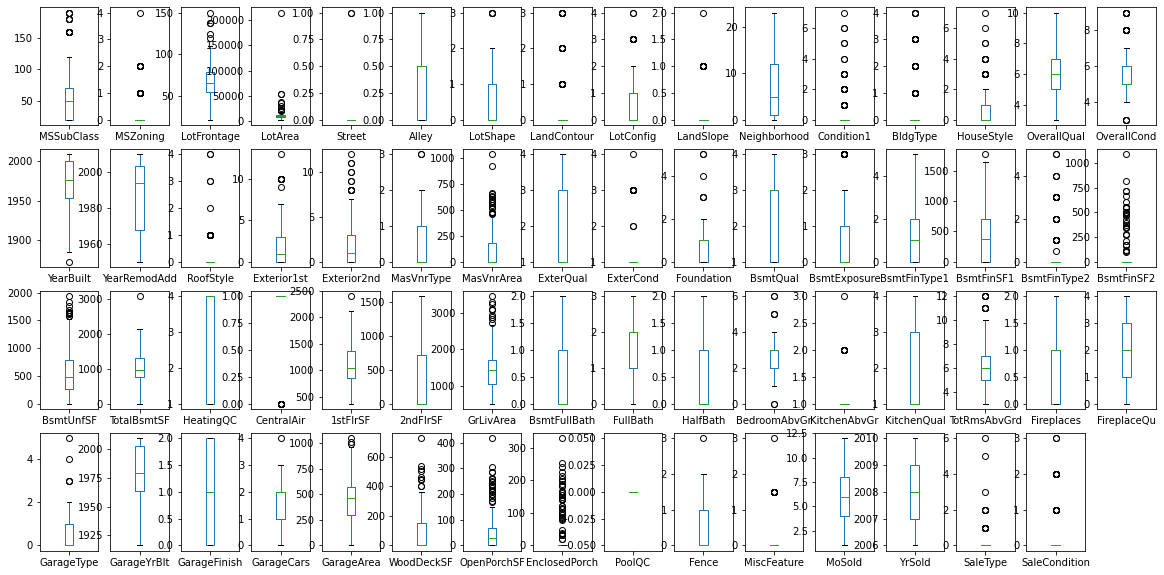

In [357]:
axs = df_test_new.plot(kind='box',subplots=True,figsize=(20,10),layout=(4,16))

In [358]:
df_test_new.skew()

MSSubClass        1.358597
MSZoning          2.292450
LotFrontage       0.325833
LotArea          12.781805
Street           12.020386
Alley             0.351743
LotShape          1.526556
LandContour       3.803969
LotConfig         1.858217
LandSlope         4.639043
Neighborhood      0.802057
Condition1        4.098191
BldgType          2.597590
HouseStyle        1.852183
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         3.182409
Exterior1st       1.706151
Exterior2nd       1.513668
MasVnrType        1.048492
MasVnrArea        1.977423
ExterQual         0.755137
ExterCond         2.626327
Foundation        1.506704
BsmtQual          0.148312
BsmtExposure      1.305828
BsmtFinType1      0.862889
BsmtFinSF1        0.739790
BsmtFinType2      3.707861
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
HeatingQC        -0.721483
CentralAir       -3.792878
1stFlrSF          0.692047
2

In [359]:
df_test_new.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0.0        20.0       0.0         21.0    1526.0     0.0    0.0       0.0   
0.1        20.0       0.0         40.0    4460.4     0.0    0.0       0.0   
0.2        20.0       0.0         50.0    6632.4     0.0    0.0       0.0   
0.3        20.0       0.0         59.3    7875.0     0.0    0.0       0.0   
0.4        30.0       0.0         60.0    8508.0     0.0    0.0       0.0   
0.5        50.0       0.0         65.0    9200.0     0.0    0.5       0.0   
0.6        60.0       0.0         70.0   10203.6     0.0    0.5       0.0   
0.7        60.0       0.0         75.0   11228.7     0.0    0.5       1.0   
0.8        80.0       1.0         80.8   12131.2     0.0    0.5       1.0   
0.9       120.0       1.0         91.9   14581.9     0.0    0.5       1.0   
1.0       190.0       4.0        150.0  215245.0     1.0    1.0       3.0   

     LandContour  LotConfig  LandSlope  Neighborhood  Condition1  BldgType  \
0.0          0.0        0.0        0.0           0.0         0.0       0.0   
0.1          0.0        0.0        0.0           0.0         0.0       0.0   
0.2          0.0        0.0        0.0           1.0         0.0       0.0   
0.3          0.0        0.0        0.0           2.0         0.0       0.0   
0.4          0.0        0.0        0.0           3.0         0.0       0.0   
0.5          0.0        0.0        0.0           5.0         0.0       0.0   
0.6          0.0        0.0        0.0           7.0         0.0       0.0   
0.7          0.0        0.0        0.0           9.7         0.0       0.0   
0.8          0.0        1.0        0.0          13.0         0.0       0.0   
0.9          0.0        2.0        0.0          16.0         1.0       1.0   
1.0          3.0        4.0        2.0          23.0         7.0       4.0   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0.0         0.0          3.0          3.0     1872.0        1950.0        0.0   
0.1         0.0          5.0          5.0     1926.0        1950.0        0.0   
0.2         0.0          5.0          5.0     1947.2        1964.0        0.0   
0.3         0.0          5.0          5.0     1959.0        1972.3        0.0   
0.4         0.0          6.0          5.0     1968.0        1980.0        0.0   
0.5         0.0          6.0          5.0     1976.0        1994.0        0.0   
0.6         1.0          6.0          5.0     1989.0        1998.0        0.0   
0.7         1.0          7.0          6.0     1999.0        2002.0        0.0   
0.8         2.0          7.0          6.0     2003.0        2004.0        1.0   
0.9         2.0          8.0          7.0     2005.0        2006.0        1.0   
1.0         7.0         10.0          9.0     2009.0        2010.0        4.0   

     Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0.0          0.0          0.0         0.0         0.0        1.0        1.0   
0.1          0.0          0.0         0.0         0.0        1.0        1.0   
0.2          0.0          0.0         0.0         0.0        1.0        1.0   
0.3          0.0          0.0         0.0         0.0        1.0        1.0   
0.4          0.0          0.4         0.0         0.0        1.0        1.0   
0.5          1.0          1.0         0.0         0.0        1.0        1.0   
0.6          2.0          2.0         1.0        40.4        1.0        1.0   
0.7          2.7          3.0         1.0       145.7        3.0        1.0   
0.8          3.0          4.0         1.0       229.2        3.0        1.0   
0.9          5.0          5.0         2.0       357.1        3.0        2.9   
1.0         13.0         12.0         3.0      1031.0        4.0        4.0   

     Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0.0         0.0       1.0           0.0           0.0         0.0   
0.1         0.0       1.0           0.0           0.0         0.0   
0.2         0.

In [360]:
df_test_new['MSZoning']=np.where(df_test_new['MSZoning']>1,1,df_test_new['MSZoning'])
print(df_test_new['MSZoning'].skew())

1.247911153271692


In [361]:
df_test_new['LotArea']=np.where(df_test_new['LotArea']<4460.4,4460.4,df_test_new['LotArea'])
df_test_new['LotArea']=np.where(df_test_new['LotArea']>14581.9,14581.9,df_test_new['LotArea'])
print(df_test_new['LotArea'].skew())

0.05863059364817195


In [362]:
df_test_new['LotConfig']=np.where(df_test_new['LotConfig']>2.0,2.0,df_test_new['LotConfig'])
print(df_test_new['LotConfig'].skew())

1.3914236374528077


In [363]:
df_test_new['LotFrontage']=np.where(df_test_new['LotFrontage']<40.0,40.0,df_test_new['LotFrontage'])
df_test_new['LotFrontage']=np.where(df_test_new['LotFrontage']>91.9,91.9,df_test_new['LotFrontage'])
print(df_test_new['LotFrontage'].skew())

-0.0015776421735410752


In [364]:
df_test_new['Condition1']=np.where(df_test_new['Condition1']>1.0,1.0,df_test_new['Condition1'])
print(df_test_new['Condition1'].skew())

2.2559291897637164


In [365]:
df_test_new['BldgType']=np.where(df_test_new['BldgType']>1.0,1.0,df_test_new['BldgType'])
print(df_test_new['BldgType'].skew())

1.6611772748336082


In [366]:
df_test_new['HouseStyle']=np.where(df_test_new['HouseStyle']>2.0,2.0,df_test_new['HouseStyle'])
print(df_test_new['HouseStyle'].skew())

0.5906499996042065


In [367]:
df_test_new['RoofStyle']=np.where(df_test_new['RoofStyle']>1.0,1.0,df_test_new['RoofStyle'])
print(df_test_new['RoofStyle'].skew())

1.3168421453629946


In [368]:
df_test_new['Exterior1st']=np.where(df_test_new['Exterior1st']>5.0,5.0,df_test_new['Exterior1st'])
print(df_test_new['Exterior1st'].skew())

0.7092141170739945


In [369]:
df_test_new['Exterior2nd']=np.where(df_test_new['Exterior2nd']>5.0,5.0,df_test_new['Exterior2nd'])
print(df_test_new['Exterior2nd'].skew())

0.6002487019071558


In [370]:
df_test_new['MasVnrArea']=np.where(df_test_new['MasVnrArea']>357.1,357.1,df_test_new['MasVnrArea'])
print(df_test_new['MasVnrArea'].skew())

1.0380955858508407


In [371]:
df_test_new['BsmtFinSF1']=np.where(df_test_new['BsmtFinSF1']>1055.7,1055.7,df_test_new['BsmtFinSF1'])
print(df_test_new['BsmtFinSF1'].skew())

0.3756532171667678


In [372]:
df_test_new['BsmtFinType2']=np.where(df_test_new['BsmtFinType2']>1.0,1.0,df_test_new['BsmtFinType2'])
print(df_test_new['BsmtFinType2'].skew())

2.5409913183282438


In [373]:
df_test_new['BsmtFinSF2']=np.where(df_test_new['BsmtFinSF2']>104.1,104.1,df_test_new['BsmtFinSF2'])
print(df_test_new['BsmtFinSF2'].skew())

2.571187661320896


In [374]:
df_test_new['TotalBsmtSF']=np.where(df_test_new['TotalBsmtSF']<630.0,630.0,df_test_new['TotalBsmtSF'])
df_test_new['TotalBsmtSF']=np.where(df_test_new['TotalBsmtSF']>1625.8,1625.8,df_test_new['TotalBsmtSF'])
print(df_test_new['TotalBsmtSF'].skew())

0.5010384914973277


In [375]:
df_test_new['2ndFlrSF']=np.where(df_test_new['2ndFlrSF']>895.9,895.9,df_test_new['2ndFlrSF'])
print(df_test_new['2ndFlrSF'].skew())

0.47110975903178715


In [376]:
df_test_new['GrLivArea']=np.where(df_test_new['GrLivArea']>2035.4,2035.4,df_test_new['GrLivArea'])
print(df_test_new['GrLivArea'].skew())

-0.08603263863970105


In [377]:
df_test_new['TotRmsAbvGrd']=np.where(df_test_new['TotRmsAbvGrd']>8.0,8.0,df_test_new['TotRmsAbvGrd'])
print(df_test_new['TotRmsAbvGrd'].skew())

-0.27420848678848825


In [378]:
df_test_new['FireplaceQu']=np.where(df_test_new['FireplaceQu']>1.0,1.0,df_test_new['FireplaceQu'])
print(df_test_new['FireplaceQu'].skew())

-6.578963503563351


In [379]:
df_test_new['GarageType']=np.where(df_test_new['GarageType']>1.0,1.0,df_test_new['GarageType'])
print(df_test_new['GarageType'].skew())

0.6036299255059769


In [380]:
df_test_new['WoodDeckSF']=np.where(df_test_new['WoodDeckSF']>261.4,261.4,df_test_new['WoodDeckSF'])
print(df_test_new['WoodDeckSF'].skew())

0.7816750642851419


In [381]:
df_test_new['OpenPorchSF']=np.where(df_test_new['OpenPorchSF']>117.8,117.8,df_test_new['OpenPorchSF'])
print(df_test_new['OpenPorchSF'].skew())

0.7296511717948885


In [382]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_test_new)
df_testx=pd.DataFrame(sc.transform(df_test_new),index=df_test_new.index,columns=df_test_new.columns)

In [383]:
pca=PCA(n_components=40)
pca.fit_transform(df_testx.values)
print(pca.explained_variance_ratio_)

[0.18295246 0.0767253  0.06699756 0.05791771 0.03870499 0.03572241
 0.0316939  0.03053654 0.02906714 0.02510981 0.0234841  0.02225173
 0.02003291 0.0197588  0.01848085 0.01777261 0.01679537 0.01593929
 0.01561916 0.01517263 0.01428929 0.01396583 0.0127145  0.01245168
 0.01123306 0.01118217 0.01078222 0.0097541  0.00951393 0.00942303
 0.00878087 0.0081354  0.00761052 0.00743095 0.00707472 0.00643519
 0.00639801 0.00590786 0.00585064 0.00533119]


In [384]:
def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    index=np.arange(num_components)
    values=pca.explained_variance_ratio_

    #define the graph
    plt.figure(figsize=(18,6))
    ax=plt.subplot(111)
    cumulative=np.cumsum(values)

    ax.bar(index,values)
    ax.plot(index,cumulative)

    #add annotation to our graph

    for val in range(num_components):
        ax.annotate(r"%s" % ((str(values[val]*100)[:3])),(index[val],values[val]),va='bottom',ha='center',fontsize=16)
    
    # setting tick parameters
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=3,length=15)
    
    #labeling x and y axis
    ax.set_xlabel('Principal Component Values')
    ax.set_ylabel('Variance Explained Percentage')
    plt.title('Scree plot of variance explained ratio for each principal component')

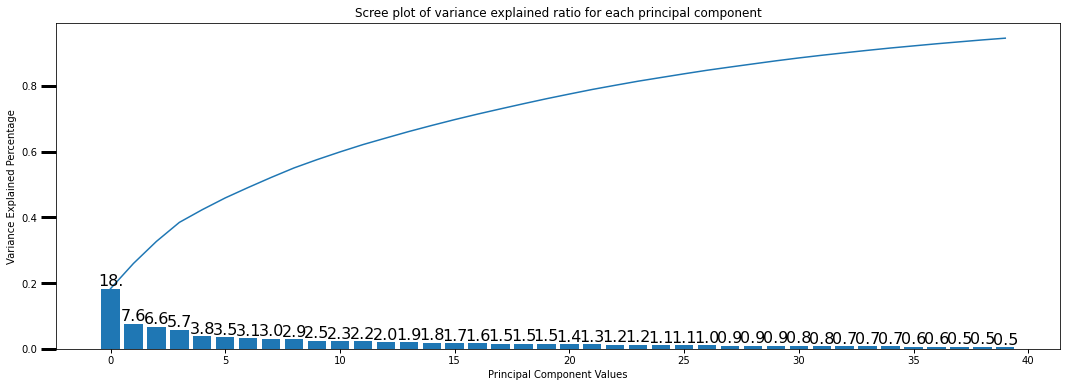

In [385]:
scree_plot(pca)

In [386]:
pca=PCA(n_components=40)
df_testx=pca.fit_transform(df_testx)
df_testx=pd.DataFrame(df_testx)

Loading all the three file for the performance evaluation on test dataset

# xgbregressor

In [387]:
loadfile=joblib.load('HousingXgb.pkl')

In [388]:
predtest_xgbregressor=loadfile.predict(df_testx)

In [389]:
predtest_xgbregressor=pd.DataFrame(predtest_xgbregressor)

In [390]:
predtest_xgbregressor.shape

(292, 1)

In [391]:
y_test.shape

(234,)

In [392]:
y_test=pd.DataFrame(y_test.values.reshape(-1,1))

In [393]:
y_test.shape

(234, 1)

In [394]:
r2_score(y_test,predtest_xgbregressor[:234])

-0.6323625200439904

In [395]:
mean_squared_error(y_test,predtest_xgbregressor[:234])

1.681393291618088

In [396]:
np.sqrt(mean_squared_error(y_test,predtest_xgbregressor[:234]))

1.2966855022009338

# Lasso Regularization

In [397]:
loadf=joblib.load('Housinglsreg2.pkl')

In [398]:
predtest_lasso_reg2=loadf.predict(df_testx)

In [399]:
r2_score(y_test,predtest_lasso_reg2[:234])

-0.9137494865914599

In [400]:
mean_squared_error(y_test,predtest_lasso_reg2[:234])

1.9712321920413398

In [401]:
np.sqrt(mean_squared_error(y_test,predtest_lasso_reg2[:234]))

1.404005766384647

# Xgbregressor Early Stoping

In [405]:
loadfl=joblib.load('HousingXgbest.pkl')

In [406]:
predtest_xgbregressor_earlystop=loadfl.predict(df_testx)

In [532]:
r2_score(y_test,predtest_xgbregressor_earlystop[:234])

-0.7926575556405566

In [533]:
mean_squared_error(y_test,predtest_xgbregressor_earlystop[:234])

1.8465030599583252

In [534]:
np.sqrt(mean_squared_error(y_test,predtest_xgbregressor_earlystop[:234]))

1.358860942097581

From above evaluation results we observe that model was initially overfitting but after Lasso Regularization we have got the best r2_score but the error rate is comparatively bit higher, but after Early stoping we can see that somewhat error rate got reduced and we obtained quite good r2_score.